In [1]:
import io
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

%matplotlib inline

Get the session file

In [2]:
sessions = {}
for x in range(1, 7):
    path = 'EPM Dataset 2/Data/Processes/Session {0}'.format(x)
    session = glob.glob(os.path.join(path, '*'))
    dataframes = (pd.read_csv(f, names=['session', 'student_Id', 'exercise', 'activity',
                                        'start_time', 'end_time', 'idle_time', 'mouse_wheel', 
                                        'mouse_wheel_click', 'mouse_click_left', 'mouse_click_right', 
                                        'mouse_movement', 'keystroke']) for f in session)
    sessions['session{0}'.format(x)] = pd.concat(dataframes, ignore_index=True, sort=False)

Session file includes the data behavioural data and the activities they did during the whole time of each session. It includes the session to which the data belongs in, the student ID, the exercise they did, the activities they did, start time of them and their end time was also included in this data. Even the data had the clicks that the students made.

In [3]:
sessions['session1'].head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0


Reading logs.txt file

In [4]:
logs = pd.read_csv('EPM Dataset 2/Data/logs.txt', sep='\t')

In [5]:
logs.head()

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
0,1,1,1,0,1,1,1
1,2,1,1,1,1,1,1
2,3,0,1,1,1,1,0
3,4,1,1,1,1,1,1
4,5,1,1,1,1,1,1


Reading both the sheets inside the Final grade excel file

In [6]:
finalgrades1 = pd.read_excel('EPM Dataset 2/Data/final_grades.xlsx', sheet_name='Exam (First time)')
finalgrades2 = pd.read_excel('EPM Dataset 2/Data/final_grades.xlsx', sheet_name='Exam (Second time)')

C:\Users\DELL\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
finalgrades1.head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,3,2.0,3,1.0,2.0,1,2,2,2.0,3.0,15.0,10.0,1,5.0,3.0,18.0,15,85.0
1,6,2.0,3,2.0,3.0,1,2,2,0.0,3.0,15.0,7.0,2,9.0,3.0,13.0,15,82.0
2,7,2.0,3,1.0,1.5,1,2,0,0.0,3.0,5.0,4.0,0,0.0,3.0,17.0,10,52.5
3,10,2.0,3,2.0,1.5,1,2,0,2.0,3.0,11.0,1.0,2,10.0,1.5,7.0,10,59.0
4,13,2.0,3,2.0,1.5,1,2,2,2.0,3.0,14.5,10.0,2,2.0,3.0,25.0,15,90.0


In [8]:
finalgrades2.head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,1,2.0,3.0,1.0,0.5,1.0,2,2.0,2,3,15,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2,3,15,2.0,0.0,5.0,1.5,5.0,0.0,44.0
2,4,2.0,3.0,1.0,0.5,1.0,2,0.0,2,0,3,4.0,0.0,1.5,0.0,5.0,5.0,30.0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2,3,3,2.0,1.5,9.0,1.5,2.0,1.0,38.5
4,7,2.0,3.0,1.0,1.5,1.0,2,2.0,2,3,15,10.0,1.0,2.5,0.0,20.0,12.0,78.0


Reading the Intermediate grades sheet

In [9]:
intergrades = pd.read_excel('EPM Dataset 2/Data/intermediate_grades.xlsx')

In [10]:
intergrades.head()

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,1,5.0,0.0,4.5,4.0,2.25
1,2,4.0,3.5,4.5,4.0,1.00
2,3,3.5,3.5,4.5,4.0,0.00
3,4,6.0,4.0,5.0,3.5,2.75
4,5,5.0,4.0,5.0,4.0,2.75


In [11]:
no_inter_grades = (intergrades == 0)
no_inter_grades

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
110,False,False,True,True,False,True
111,False,True,True,True,True,True
112,False,True,True,True,True,True
113,False,True,True,True,True,True


In [12]:
nolog = (logs == 0)
nolog


,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
110,False,False,True,True,True,True,True
111,False,False,True,True,True,True,True
112,False,False,True,True,True,True,True
113,False,False,True,True,True,True,True


In [13]:
nolog.drop('Session 1', axis=1, inplace=True)


Logs session 1 was deleted because the intermediate grades file did not have the session 1 and for comparingt them we need to drop the session 1 from logs dataset.

In [14]:
nolog

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
110,False,True,True,True,True,True
111,False,True,True,True,True,True
112,False,True,True,True,True,True
113,False,True,True,True,True,True


In [15]:
nogradecontrast = (nolog != no_inter_grades)

In [16]:
nogradecontrast.loc[nogradecontrast['Session 2'] == True]

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
26,False,True,False,False,False,False
34,False,True,False,False,False,False
54,False,True,False,False,False,True
59,False,True,True,False,False,False
60,False,True,False,False,False,False
65,False,True,False,False,False,False
67,False,True,False,False,False,False
88,False,True,False,False,False,False
106,False,True,False,False,False,False
110,False,True,False,False,True,False


All those True values means that not all the no log students get a zero score in intermediate grades. 

In [17]:
session2_index = nogradecontrast.loc[nogradecontrast['Session 2'] == True].index

In [18]:
intergrades.iloc[session2_index]

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
26,27,0.0,3.0,4.5,4.0,1.75
34,35,0.5,0.5,3.5,3.5,1.50
54,55,2.0,3.5,4.5,4.0,2.50
59,60,2.0,0.5,4.0,3.5,1.00
60,61,0.0,1.0,4.5,3.5,1.50
65,66,0.0,2.0,4.5,3.0,2.25
67,68,5.5,3.5,5.0,4.0,3.00
88,89,0.5,1.5,3.5,2.5,0.50
106,107,0.0,1.0,0.0,0.0,0.00
110,111,3.0,0.0,0.0,3.0,0.00


In [19]:
logs.iloc[session2_index]

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
26,27,0,1,1,1,1,1
34,35,0,0,1,1,1,1
54,55,1,0,1,1,1,0
59,60,0,0,0,1,1,1
60,61,0,1,1,1,1,1
65,66,1,1,1,1,1,1
67,68,1,0,1,1,1,1
88,89,0,0,1,1,1,1
106,107,0,1,1,0,0,0
110,111,1,0,0,0,0,0


We can see that from the above data the student ID number 27 got log in session 2 but does not have any marks in the intermediate score. This means that not all students who got a log in sessions even got a score or not. 

To solve this problem we need to neglect the intermediate grades worksheet also we need to see how many studnets attended all the sessions in the final grades data and then come to the conclusion.

In [20]:
logs.iloc[:, 1:].sum(axis=1).value_counts()

6    49
5    22
4    15
1    13
3    11
2     5
dtype: int64

In [21]:
logs.loc[logs.iloc[:, 1:].sum(axis=1) == 6]

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
1,2,1,1,1,1,1,1
3,4,1,1,1,1,1,1
4,5,1,1,1,1,1,1
6,7,1,1,1,1,1,1
9,10,1,1,1,1,1,1
10,11,1,1,1,1,1,1
11,12,1,1,1,1,1,1
13,14,1,1,1,1,1,1
14,15,1,1,1,1,1,1
16,17,1,1,1,1,1,1


These all students attended all the 6 sessions.

To check which students appeared in both exams

In [22]:
attend_1st_id = np.asarray(finalgrades1['Student ID'])
attend_2nd_id = np.asarray(finalgrades2['Student ID'])

In [23]:
def common_member(a, b):
    a_set = set(a)
    b_set = set(b)
    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print('No common elements')

In [24]:
attendBoth = common_member(attend_1st_id, attend_2nd_id)

{7, 20, 24, 30, 37, 39, 44, 46, 51, 56, 59, 62, 67, 68, 73, 83, 87, 92, 99, 101, 106}


These were the stidents who attended both the exams in finals data.

Cleaning Data

In [25]:
IDlist = logs.loc[logs.iloc[:, 1:].sum(axis=1) == 6]
IDlist.head()

,Student Id,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6
1,2,1,1,1,1,1,1
3,4,1,1,1,1,1,1
4,5,1,1,1,1,1,1
6,7,1,1,1,1,1,1
9,10,1,1,1,1,1,1


We got the list of studnets from log that had also all sessions as 1.

In [26]:
IDlist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 97
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Student Id  49 non-null     int64
 1   Session 1   49 non-null     int64
 2   Session 2   49 non-null     int64
 3   Session 3   49 non-null     int64
 4   Session 4   49 non-null     int64
 5   Session 5   49 non-null     int64
 6   Session 6   49 non-null     int64
dtypes: int64(7)
memory usage: 3.1 KB


In [27]:
final = finalgrades1.append(finalgrades2)
final.sort_values(by=['Student ID']).head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,1,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,15.0,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0
0,3,2.0,3.0,1.0,2.0,1.0,2,2.0,2.0,3.0,15.0,10.0,1.0,5.0,3.0,18.0,15.0,85.0
2,4,2.0,3.0,1.0,0.5,1.0,2,0.0,2.0,0.0,3.0,4.0,0.0,1.5,0.0,5.0,5.0,30.0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.0,1.5,2.0,1.0,38.5


Next we combined the finals sheet 1 and final sheet 2.

In [28]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 61
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          114 non-null    int64  
 1   ES 1.1 
(2 points)  114 non-null    float64
 2   ES 1.2 
(3 points)  114 non-null    float64
 3   ES 2.1
(2 points)   114 non-null    float64
 4   ES 2.2
(3 points)   114 non-null    float64
 5   ES 3.1
(1 points)   114 non-null    float64
 6   ES 3.2
(2 points)   114 non-null    int64  
 7   ES 3.3
(2 points)   114 non-null    float64
 8   ES 3.4
(2 points)   114 non-null    float64
 9   ES 3.5
(3 points)   114 non-null    float64
 10  ES 4.1
(15 points)  114 non-null    float64
 11  ES 4.2
(10 points)  114 non-null    float64
 12  ES 5.1
(2 points)   114 non-null    float64
 13  ES 5.2
(10 points)  114 non-null    float64
 14  ES 5.3
(3 points)   114 non-null    float64
 15  ES 6.1
(25 points)  114 non-null    float64
 16  ES 6.2
(1

Removing if there are any duplicate data is the next thing we needed to do.

In [29]:
duprows = final[final['Student ID'].duplicated(keep=False)]

In [30]:
final.drop(duprows.index, axis=0, inplace=True)

In [31]:
final

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
0,3,2.0,3.0,1.0,2.0,1.0,2,2.0,2.0,3.0,15.0,10.0,1.0,5.0,3.0,18.0,15.0,85.0
1,6,2.0,3.0,2.0,3.0,1.0,2,2.0,0.0,3.0,15.0,7.0,2.0,9.0,3.0,13.0,15.0,82.0
3,10,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.0,1.5,7.0,10.0,59.0
5,15,2.0,3.0,1.0,2.0,1.0,2,2.0,2.0,3.0,15.0,10.0,2.0,4.0,1.5,2.0,15.0,67.5
6,16,2.0,3.0,1.0,0.0,1.0,2,2.0,2.0,3.0,3.0,9.0,1.0,0.0,3.0,20.0,15.0,67.0
7,17,2.0,3.0,1.0,2.0,1.0,2,2.0,2.0,3.0,15.0,10.0,2.0,10.0,3.0,24.0,15.0,97.0
8,18,1.0,3.0,2.0,3.0,1.0,2,2.0,2.0,3.0,15.0,7.0,2.0,2.5,1.5,5.0,10.0,62.0
12,28,2.0,3.0,1.0,2.0,1.0,2,2.0,2.0,0.0,15.0,8.5,2.0,4.0,3.0,19.0,13.0,79.5
16,36,2.0,3.0,1.0,0.0,1.0,1,0.0,2.0,3.0,13.0,9.0,2.0,10.0,3.0,16.0,13.0,79.0
19,41,2.0,3.0,2.0,3.0,1.0,2,2.0,2.0,3.0,13.0,10.0,2.0,10.0,3.0,25.0,15.0,98.0


In [32]:
avggrades = duprows.groupby('Student ID').mean()
avggrades.insert(0, column='Student ID', value=avggrades.index)

In [33]:
final = final.append(avggrades).sort_values(by=['Student ID'])

In [34]:
final = final[final['Student ID'].isin(IDlist['Student Id'])]
final

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
1,2,2.00,3.0,2.00,0.50,1.0,2,0.0,2.0,3.00,15.00,2.0,0.0,5.00,1.50,5.00,0.00,44.00
3,5,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,3.00,3.00,2.0,1.5,9.00,1.50,2.00,1.00,38.50
7,7,2.00,3.0,1.00,1.50,1.0,2,1.0,1.0,3.00,10.00,7.0,0.5,1.25,1.50,18.50,11.00,65.25
3,10,2.00,3.0,2.00,1.50,1.0,2,0.0,2.0,3.00,11.00,1.0,2.0,10.00,1.50,7.00,10.00,59.00
7,11,2.00,3.0,1.00,0.50,1.0,2,2.0,2.0,3.00,12.00,3.0,2.0,8.00,1.50,12.00,5.00,60.00
8,12,2.00,3.0,0.50,2.00,1.0,2,0.0,2.0,3.00,15.00,2.0,0.5,5.50,2.00,0.00,0.00,40.50
5,15,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.0,4.00,1.50,2.00,15.00,67.50
7,17,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.0,10.00,3.00,24.00,15.00,97.00
20,20,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,2.25,15.00,10.0,1.0,4.00,3.00,15.00,12.25,78.00
12,28,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,0.00,15.00,8.5,2.0,4.00,3.00,19.00,13.00,79.50


In [35]:
final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 47
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          34 non-null     int64  
 1   ES 1.1 
(2 points)  34 non-null     float64
 2   ES 1.2 
(3 points)  34 non-null     float64
 3   ES 2.1
(2 points)   34 non-null     float64
 4   ES 2.2
(3 points)   34 non-null     float64
 5   ES 3.1
(1 points)   34 non-null     float64
 6   ES 3.2
(2 points)   34 non-null     int64  
 7   ES 3.3
(2 points)   34 non-null     float64
 8   ES 3.4
(2 points)   34 non-null     float64
 9   ES 3.5
(3 points)   34 non-null     float64
 10  ES 4.1
(15 points)  34 non-null     float64
 11  ES 4.2
(10 points)  34 non-null     float64
 12  ES 5.1
(2 points)   34 non-null     float64
 13  ES 5.2
(10 points)  34 non-null     float64
 14  ES 5.3
(3 points)   34 non-null     float64
 15  ES 6.1
(25 points)  34 non-null     float64
 16  ES 6.2
(15

In [36]:
df = final.copy()

To get the final result we need to know who all students have alreay scored the passing marks that is >=60.

In [37]:
df['pass_IND'] = (df['TOTAL\n(100 points)'] >= 60).astype(int)

In [38]:
df.head()

,Student ID,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points),pass_IND
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.00,1.5,5.0,0.0,44.00,0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.00,1.5,2.0,1.0,38.50,0
7,7,2.0,3.0,1.0,1.5,1.0,2,1.0,1.0,3.0,10.0,7.0,0.5,1.25,1.5,18.5,11.0,65.25,1
3,10,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.00,1.5,7.0,10.0,59.00,0
7,11,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,12.0,3.0,2.0,8.00,1.5,12.0,5.0,60.00,1


In [39]:
intergrades.head()

,Student Id,Session 2,Session 3,Session 4,Session 5,Session 6
0,1,5.0,0.0,4.5,4.0,2.25
1,2,4.0,3.5,4.5,4.0,1.00
2,3,3.5,3.5,4.5,4.0,0.00
3,4,6.0,4.0,5.0,3.5,2.75
4,5,5.0,4.0,5.0,4.0,2.75


we also merged the intermediate grades sheet with the final sheet.

In [40]:
df = pd.merge(intergrades, df, how="inner", left_on="Student Id", right_on="Student ID")

# drop the duplicated column
df.drop(['Student ID'], axis=1, inplace=True)

# rename columns
df.rename(columns={"Student Id": 'ID', "TOTAL\n(100 points)": 'total'}, inplace=True)

pd.set_option('max_columns', 80)
df.head()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.00,1.5,5.0,0.0,44.00,0
1,5,5.0,4.0,5.0,4.0,2.75,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.00,1.5,2.0,1.0,38.50,0
2,7,4.0,4.0,4.5,4.0,2.00,2.0,3.0,1.0,1.5,1.0,2,1.0,1.0,3.0,10.0,7.0,0.5,1.25,1.5,18.5,11.0,65.25,1
3,10,5.0,4.0,4.5,4.0,3.00,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.00,1.5,7.0,10.0,59.00,0
4,11,4.0,2.0,5.0,4.0,1.50,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,12.0,3.0,2.0,8.00,1.5,12.0,5.0,60.00,1


In [41]:
df

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,2.00,3.0,2.00,0.50,1.0,2,0.0,2.0,3.00,15.00,2.0,0.0,5.00,1.50,5.00,0.00,44.00,0
1,5,5.0,4.0,5.0,4.0,2.75,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,3.00,3.00,2.0,1.5,9.00,1.50,2.00,1.00,38.50,0
2,7,4.0,4.0,4.5,4.0,2.00,2.00,3.0,1.00,1.50,1.0,2,1.0,1.0,3.00,10.00,7.0,0.5,1.25,1.50,18.50,11.00,65.25,1
3,10,5.0,4.0,4.5,4.0,3.00,2.00,3.0,2.00,1.50,1.0,2,0.0,2.0,3.00,11.00,1.0,2.0,10.00,1.50,7.00,10.00,59.00,0
4,11,4.0,2.0,5.0,4.0,1.50,2.00,3.0,1.00,0.50,1.0,2,2.0,2.0,3.00,12.00,3.0,2.0,8.00,1.50,12.00,5.00,60.00,1
5,12,3.5,3.5,4.5,4.0,2.00,2.00,3.0,0.50,2.00,1.0,2,0.0,2.0,3.00,15.00,2.0,0.5,5.50,2.00,0.00,0.00,40.50,0
6,15,2.0,4.0,5.0,4.0,2.00,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.0,4.00,1.50,2.00,15.00,67.50,1
7,17,3.5,3.5,5.0,4.0,4.00,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,3.00,15.00,10.0,2.0,10.00,3.00,24.00,15.00,97.00,1
8,20,3.0,3.0,4.5,3.5,2.00,2.00,3.0,2.00,1.50,1.0,2,2.0,2.0,2.25,15.00,10.0,1.0,4.00,3.00,15.00,12.25,78.00,1
9,28,6.0,4.0,5.0,4.0,3.00,2.00,3.0,1.00,2.00,1.0,2,2.0,2.0,0.00,15.00,8.5,2.0,4.00,3.00,19.00,13.00,79.50,1


Clean logs data

Now for cleaning the data we need the activities that they did during their classes and sessions. So we save that in the behavior variable.

In [42]:
behavior = pd.DataFrame()
for i in range(1, 7):
    behavior = behavior.append(sessions['session{0}'.format(i)])

In [43]:
behavior.head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0


In [44]:
behavior.describe()

,session,student_Id,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
count,230318.000000,230318.000000,2.303180e+05,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000,230318.000000
mean,3.694779,53.626903,-1.847882e+09,2.743854,0.005445,7.068774,0.336109,414.532755,6.279835
std,1.770124,31.542431,4.497414e+11,27.139552,0.223367,21.545819,3.017604,1272.397451,50.960664
min,1.000000,1.000000,-2.059092e+14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,27.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000,62.000000,0.000000
50%,4.000000,53.000000,8.000000e+01,0.000000,0.000000,2.000000,0.000000,138.000000,0.000000
75%,5.000000,81.000000,5.749750e+03,0.000000,0.000000,5.000000,0.000000,335.000000,0.000000
max,6.000000,115.000000,7.244736e+09,2904.000000,60.000000,1096.000000,168.000000,85949.000000,4754.000000


In [45]:
behavior.duplicated().sum()

0

To get the data sorted we need to find from the processes data that what data we can use and what we can neglect.

In [46]:
from datetime import timedelta

In [47]:
behavior['work_time'] = (pd.to_datetime(behavior['end_time']) - \
                         pd.to_datetime(behavior['start_time'])).dt.total_seconds()

In [48]:
behavior.head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,work_time
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0,1.0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0,7.0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0,0.0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4,33.0
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0,0.0


In [49]:
behavior.activity.value_counts()

 Other                33602
 Blank                24303
 Diagram              20815
 Properties           19677
 Aulaweb               8261
                      ...  
 Study_Es_6_6            34
 Study_Es_6_5            33
 Fsm_Related             25
 TextEditor_Es_6_5        4
 TextEditor_Es_6_6        3
Name: activity, Length: 99, dtype: int64

We can see in the above code that there are some data that have blank values and have other values which are not usable so we need to remove them.

In [50]:
# reset index to remove duplicated index
behavior = behavior.reset_index(drop=True)

In [51]:
behavior.head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,work_time
0,1,1,Es,Other,2.10.2014 11:25:33,2.10.2014 11:25:34,0,0,0,0,0,84,0,1.0
1,1,1,Es,Aulaweb,2.10.2014 11:25:35,2.10.2014 11:25:42,218,0,0,4,0,397,0,7.0
2,1,1,Es,Blank,2.10.2014 11:25:43,2.10.2014 11:25:43,0,0,0,0,0,59,0,0.0
3,1,1,Es,Deeds,2.10.2014 11:25:44,2.10.2014 11:26:17,154117,6,0,8,0,1581,4,33.0
4,1,1,Es,Other,2.10.2014 11:26:18,2.10.2014 11:26:18,0,0,0,2,0,103,0,0.0


In [52]:
noiseindex = behavior.loc[behavior.activity.str.contains('Other|Blank', regex=True)].index

In [53]:
noiseindex

Int64Index([     0,      2,      4,      5,      6,     10,     13,     15,
                22,     24,
            ...
            230301, 230302, 230304, 230305, 230307, 230309, 230310, 230312,
            230314, 230315],
           dtype='int64', length=57905)

In [54]:
behavior.drop(index=noiseindex, inplace=True)

In [55]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172413 entries, 1 to 230317
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   session            172413 non-null  int64  
 1   student_Id         172413 non-null  int64  
 2   exercise           172413 non-null  object 
 3   activity           172413 non-null  object 
 4   start_time         172413 non-null  object 
 5   end_time           172413 non-null  object 
 6   idle_time          172413 non-null  int64  
 7   mouse_wheel        172413 non-null  int64  
 8   mouse_wheel_click  172413 non-null  int64  
 9   mouse_click_left   172413 non-null  int64  
 10  mouse_click_right  172413 non-null  int64  
 11  mouse_movement     172413 non-null  int64  
 12  keystroke          172413 non-null  int64  
 13  work_time          172413 non-null  float64
dtypes: float64(1), int64(9), object(4)
memory usage: 19.7+ MB


In [56]:
behavior = behavior.loc[behavior['student_Id'].isin(df.ID)]
behavior = behavior.reset_index(drop=True)

In [57]:
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67974 entries, 0 to 67973
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session            67974 non-null  int64  
 1   student_Id         67974 non-null  int64  
 2   exercise           67974 non-null  object 
 3   activity           67974 non-null  object 
 4   start_time         67974 non-null  object 
 5   end_time           67974 non-null  object 
 6   idle_time          67974 non-null  int64  
 7   mouse_wheel        67974 non-null  int64  
 8   mouse_wheel_click  67974 non-null  int64  
 9   mouse_click_left   67974 non-null  int64  
 10  mouse_click_right  67974 non-null  int64  
 11  mouse_movement     67974 non-null  int64  
 12  keystroke          67974 non-null  int64  
 13  work_time          67974 non-null  float64
dtypes: float64(1), int64(9), object(4)
memory usage: 7.3+ MB


In [58]:
behavior.head()

,session,student_Id,exercise,activity,start_time,end_time,idle_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,work_time
0,1,10,Es_1_1,Deeds_Es_1_1,2.10.2014 11:30:23,2.10.2014 11:41:31,101934624,0,0,186,44,12954,0,668.0
1,1,10,Es_1_1,Deeds_Es_1_1,2.10.2014 11:41:33,2.10.2014 11:41:54,177214,0,0,6,0,562,0,21.0
2,1,10,Es_1_1,Deeds_Es_1_1,2.10.2014 11:44:10,2.10.2014 11:44:11,0,0,0,2,0,200,0,1.0
3,1,10,Es_1_1,Deeds_Es_1_1,2.10.2014 11:44:20,2.10.2014 11:44:20,0,0,0,2,0,92,0,0.0
4,1,10,Es_1_1,TextEditor,2.10.2014 11:44:21,2.10.2014 11:44:21,0,0,0,0,0,16,0,0.0


In [59]:
behavior.student_Id.value_counts().size

34

In the final data we get to know that their are only 34 studnets who are usable for accessing and for modelling process.

In [60]:
sum_behv = behavior.groupby(['student_Id', 'session'], as_index=False).\
           agg({'work_time':'sum', 'idle_time': 'sum', 'mouse_wheel': 'sum', \
                'mouse_wheel_click': 'sum', 'mouse_click_left': 'sum', \
                'mouse_click_right': 'sum', 'mouse_movement': 'sum', 'keystroke': 'sum'})

In [61]:
sum_behv.drop(columns=['idle_time'], inplace=True)

In [62]:
sum_behv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 203
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   student_Id         204 non-null    int64  
 1   session            204 non-null    int64  
 2   work_time          204 non-null    float64
 3   mouse_wheel        204 non-null    int64  
 4   mouse_wheel_click  204 non-null    int64  
 5   mouse_click_left   204 non-null    int64  
 6   mouse_click_right  204 non-null    int64  
 7   mouse_movement     204 non-null    int64  
 8   keystroke          204 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 15.9 KB


In [63]:
sum_behv.head()

,student_Id,session,work_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke
0,2,1,4215.0,0,0,2,0,45,1047
1,2,2,8500.0,0,0,3696,98,69226,5151
2,2,3,9741.0,1379,0,5543,304,259130,4873
3,2,4,4095.0,826,0,1857,82,91633,2232
4,2,5,5128.0,1570,0,2211,164,122581,3142


In [64]:
behv = sum_behv.pivot(index='student_Id', columns='session', 
                      values=['work_time', 'mouse_wheel', 'mouse_wheel_click', 'mouse_click_left', 
                              'mouse_click_right', 'mouse_movement', 'keystroke'])
behv.head()

work_time                                         mouse_wheel  \
session            1       2       3       4       5       6           1   
student_Id                                                                 
2             4215.0  8500.0  9741.0  4095.0  5128.0  5706.0         0.0   
5             4071.0  7754.0  8489.0  3252.0  5037.0  9027.0       586.0   
7             5086.0  7975.0  9421.0  4893.0  3465.0  8999.0         0.0   
10            4660.0  7736.0  8413.0  4976.0  5269.0  8151.0       573.0   
11            4908.0  8785.0  9968.0  2459.0  3959.0  9095.0       312.0   

                                                  mouse_wheel_click            \
session          2       3      4       5       6                 1    2    3   
student_Id                                                                      
2              0.0  1379.0  826.0  1570.0   708.0               0.0  0.0  0.0   
5           1538.0  2069.0  489.0  1138.0   904.0               0.0  0.0  0.0   
7           2145.0   728.0  342.0  1088.0   968.0              18.0  0.0  0.0   
10          1305.0   517.0  957.0  2577.0  1131.0               0.0  0.0  4.0   
11          1153.0   153.0  539.0   888.0   493.0               0.0  0.0  0.0   

                          mouse_click_left                                  \
session       4    5    6                1       2       3       4       5   
student_Id                                                                   
2           0.0  0.0  0.0              2.0  3696.0  5543.0  1857.0  2211.0   
5           0.0  0.0  0.0           1977.0  4303.0  2703.0  1419.0  1924.0   
7           0.0  2.0  0.0           2238.0  2733.0  3761.0  1068.0  1088.0   
10          0.0  0.0  0.0           2244.0  3830.0  4709.0  5112.0  3855.0   
11          0.0  0.0  0.0           2446.0  2987.0   323.0  1429.0  1826.0   

                   mouse_click_right                                    \
session          6                 1      2      3     4      5      6   
student_Id                                                               
2           2812.0               0.0   98.0  304.0  82.0  164.0  104.0   
5           4857.0              10.0   65.0  117.0  74.0  130.0  114.0   
7           3533.0              64.0  168.0  390.0  34.0   82.0   96.0   
10          4846.0             171.0  320.0  358.0  48.0  146.0   86.0   
11          4583.0             149.0  274.0    2.0  15.0  132.0   62.0   

           mouse_movement                                                    \
session                 1         2         3         4         5         6   
student_Id                                                                    
2                    45.0   69226.0  259130.0   91633.0  122581.0  165494.0   
5                207317.0  317737.0  273721.0  119589.0  198103.0  427595.0   
7                107269.0  207043.0  156059.0   61183.0   84820.0  241519.0   
10               145381.0  226786.0  262458.0  183880.0  175403.0  246180.0   
11               219138.0  302207.0   26362.0  125858.0  195455.0  381456.0   

           keystroke                                          
session            1       2       3       4       5       6  
student_Id                                                    
2             1047.0  5151.0  4873.0  2232.0  3142.0  1140.0  
5             1207.0  5450.0  7433.0  2369.0  2701.0  1552.0  
7             1745.0  3873.0  5159.0  3270.0  3491.0   727.0  
10             653.0  4299.0  2982.0  2394.0  2744.0   980.0  
11             458.0  3534.0  2609.0  2138.0  1887.0  1084.0

In [65]:
level_one = behv.columns.get_level_values(0).astype(str)
level_two = behv.columns.get_level_values(1).astype(str)

In [66]:
behv.columns = level_one + level_two

In [67]:
behv.reset_index(inplace=True)

In [68]:
behv.head()

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6
0,2,4215.0,8500.0,9741.0,4095.0,5128.0,5706.0,0.0,0.0,1379.0,826.0,1570.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3696.0,5543.0,1857.0,2211.0,2812.0,0.0,98.0,304.0,82.0,164.0,104.0,45.0,69226.0,259130.0,91633.0,122581.0,165494.0,1047.0,5151.0,4873.0,2232.0,3142.0,1140.0
1,5,4071.0,7754.0,8489.0,3252.0,5037.0,9027.0,586.0,1538.0,2069.0,489.0,1138.0,904.0,0.0,0.0,0.0,0.0,0.0,0.0,1977.0,4303.0,2703.0,1419.0,1924.0,4857.0,10.0,65.0,117.0,74.0,130.0,114.0,207317.0,317737.0,273721.0,119589.0,198103.0,427595.0,1207.0,5450.0,7433.0,2369.0,2701.0,1552.0
2,7,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,342.0,1088.0,968.0,18.0,0.0,0.0,0.0,2.0,0.0,2238.0,2733.0,3761.0,1068.0,1088.0,3533.0,64.0,168.0,390.0,34.0,82.0,96.0,107269.0,207043.0,156059.0,61183.0,84820.0,241519.0,1745.0,3873.0,5159.0,3270.0,3491.0,727.0
3,10,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,957.0,2577.0,1131.0,0.0,0.0,4.0,0.0,0.0,0.0,2244.0,3830.0,4709.0,5112.0,3855.0,4846.0,171.0,320.0,358.0,48.0,146.0,86.0,145381.0,226786.0,262458.0,183880.0,175403.0,246180.0,653.0,4299.0,2982.0,2394.0,2744.0,980.0
4,11,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,888.0,493.0,0.0,0.0,0.0,0.0,0.0,0.0,2446.0,2987.0,323.0,1429.0,1826.0,4583.0,149.0,274.0,2.0,15.0,132.0,62.0,219138.0,302207.0,26362.0,125858.0,195455.0,381456.0,458.0,3534.0,2609.0,2138.0,1887.0,1084.0


In [69]:
behv.isna().sum()

student_Id            0
work_time1            0
work_time2            0
work_time3            0
work_time4            0
work_time5            0
work_time6            0
mouse_wheel1          0
mouse_wheel2          0
mouse_wheel3          0
mouse_wheel4          0
mouse_wheel5          0
mouse_wheel6          0
mouse_wheel_click1    0
mouse_wheel_click2    0
mouse_wheel_click3    0
mouse_wheel_click4    0
mouse_wheel_click5    0
mouse_wheel_click6    0
mouse_click_left1     0
mouse_click_left2     0
mouse_click_left3     0
mouse_click_left4     0
mouse_click_left5     0
mouse_click_left6     0
mouse_click_right1    0
mouse_click_right2    0
mouse_click_right3    0
mouse_click_right4    0
mouse_click_right5    0
mouse_click_right6    0
mouse_movement1       0
mouse_movement2       0
mouse_movement3       0
mouse_movement4       0
mouse_movement5       0
mouse_movement6       0
keystroke1            0
keystroke2            0
keystroke3            0
keystroke4            0
keystroke5      

We finally cleaned all the data from activities with no blanks and null values.

Join Datasets

In [70]:
df_clean = df.copy()

In [71]:
df_clean.head()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.00,1.5,5.0,0.0,44.00,0
1,5,5.0,4.0,5.0,4.0,2.75,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.00,1.5,2.0,1.0,38.50,0
2,7,4.0,4.0,4.5,4.0,2.00,2.0,3.0,1.0,1.5,1.0,2,1.0,1.0,3.0,10.0,7.0,0.5,1.25,1.5,18.5,11.0,65.25,1
3,10,5.0,4.0,4.5,4.0,3.00,2.0,3.0,2.0,1.5,1.0,2,0.0,2.0,3.0,11.0,1.0,2.0,10.00,1.5,7.0,10.0,59.00,0
4,11,4.0,2.0,5.0,4.0,1.50,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,12.0,3.0,2.0,8.00,1.5,12.0,5.0,60.00,1


In [72]:
df_clean.columns

Index(['ID', 'Session 2', 'Session 3', 'Session 4', 'Session 5', 'Session 6',
       'ES 1.1 \n(2 points)', 'ES 1.2 \n(3 points)', 'ES 2.1\n(2 points)',
       'ES 2.2\n(3 points)', 'ES 3.1\n(1 points)', 'ES 3.2\n(2 points)',
       'ES 3.3\n(2 points)', 'ES 3.4\n(2 points)', 'ES 3.5\n(3 points)',
       'ES 4.1\n(15 points)', 'ES 4.2\n(10 points)', 'ES 5.1\n(2 points)',
       'ES 5.2\n(10 points)', 'ES 5.3\n(3 points)', 'ES 6.1\n(25 points)',
       'ES 6.2\n(15 points)', 'total', 'pass_IND'],
      dtype='object')

We only need the total marks to calculate the final outcome of how many students are passing and how many are failing.

In [73]:
df_clean.drop(['ES 1.1 \n(2 points)', 'ES 1.2 \n(3 points)', 'ES 2.1\n(2 points)',
       'ES 2.2\n(3 points)', 'ES 3.1\n(1 points)', 'ES 3.2\n(2 points)',
       'ES 3.3\n(2 points)', 'ES 3.4\n(2 points)', 'ES 3.5\n(3 points)',
       'ES 4.1\n(15 points)', 'ES 4.2\n(10 points)', 'ES 5.1\n(2 points)',
       'ES 5.2\n(10 points)', 'ES 5.3\n(3 points)', 'ES 6.1\n(25 points)',
       'ES 6.2\n(15 points)', 'total'], axis=1, inplace=True)

In [74]:
df_clean.head()

,ID,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
0,2,4.0,3.5,4.5,4.0,1.00,0
1,5,5.0,4.0,5.0,4.0,2.75,0
2,7,4.0,4.0,4.5,4.0,2.00,1
3,10,5.0,4.0,4.5,4.0,3.00,0
4,11,4.0,2.0,5.0,4.0,1.50,1


In [75]:
df_clean = pd.merge(behv, df_clean, how='inner', left_on='student_Id', right_on='ID')
df_clean.drop(['ID'], axis=1, inplace=True)

In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_Id          34 non-null     int64  
 1   work_time1          34 non-null     float64
 2   work_time2          34 non-null     float64
 3   work_time3          34 non-null     float64
 4   work_time4          34 non-null     float64
 5   work_time5          34 non-null     float64
 6   work_time6          34 non-null     float64
 7   mouse_wheel1        34 non-null     float64
 8   mouse_wheel2        34 non-null     float64
 9   mouse_wheel3        34 non-null     float64
 10  mouse_wheel4        34 non-null     float64
 11  mouse_wheel5        34 non-null     float64
 12  mouse_wheel6        34 non-null     float64
 13  mouse_wheel_click1  34 non-null     float64
 14  mouse_wheel_click2  34 non-null     float64
 15  mouse_wheel_click3  34 non-null     float64
 16  mouse_whee

In [77]:
df_clean.head()

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
0,2,4215.0,8500.0,9741.0,4095.0,5128.0,5706.0,0.0,0.0,1379.0,826.0,1570.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3696.0,5543.0,1857.0,2211.0,2812.0,0.0,98.0,304.0,82.0,164.0,104.0,45.0,69226.0,259130.0,91633.0,122581.0,165494.0,1047.0,5151.0,4873.0,2232.0,3142.0,1140.0,4.0,3.5,4.5,4.0,1.00,0
1,5,4071.0,7754.0,8489.0,3252.0,5037.0,9027.0,586.0,1538.0,2069.0,489.0,1138.0,904.0,0.0,0.0,0.0,0.0,0.0,0.0,1977.0,4303.0,2703.0,1419.0,1924.0,4857.0,10.0,65.0,117.0,74.0,130.0,114.0,207317.0,317737.0,273721.0,119589.0,198103.0,427595.0,1207.0,5450.0,7433.0,2369.0,2701.0,1552.0,5.0,4.0,5.0,4.0,2.75,0
2,7,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,342.0,1088.0,968.0,18.0,0.0,0.0,0.0,2.0,0.0,2238.0,2733.0,3761.0,1068.0,1088.0,3533.0,64.0,168.0,390.0,34.0,82.0,96.0,107269.0,207043.0,156059.0,61183.0,84820.0,241519.0,1745.0,3873.0,5159.0,3270.0,3491.0,727.0,4.0,4.0,4.5,4.0,2.00,1
3,10,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,957.0,2577.0,1131.0,0.0,0.0,4.0,0.0,0.0,0.0,2244.0,3830.0,4709.0,5112.0,3855.0,4846.0,171.0,320.0,358.0,48.0,146.0,86.0,145381.0,226786.0,262458.0,183880.0,175403.0,246180.0,653.0,4299.0,2982.0,2394.0,2744.0,980.0,5.0,4.0,4.5,4.0,3.00,0
4,11,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,888.0,493.0,0.0,0.0,0.0,0.0,0.0,0.0,2446.0,2987.0,323.0,1429.0,1826.0,4583.0,149.0,274.0,2.0,15.0,132.0,62.0,219138.0,302207.0,26362.0,125858.0,195455.0,381456.0,458.0,3534.0,2609.0,2138.0,1887.0,1084.0,4.0,2.0,5.0,4.0,1.50,1


In [78]:
df_clean.to_csv("epm_clean.csv", encoding='utf-8', index=False)

In [79]:
df_clean = pd.read_csv('epm_clean.csv')

In [80]:
df_clean.describe()

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.00000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,51.382353,4533.117647,7999.941176,9055.794118,4253.764706,5201.558824,8869.382353,583.705882,1173.088235,2007.058824,641.058824,956.588235,670.617647,3.000000,3.970588,2.911765,1.176471,2.470588,7.176471,2203.558824,2834.117647,3474.470588,1951.941176,2159.529412,4009.058824,121.558824,187.176471,239.323529,45.00000,93.558824,56.088235,119797.352941,163406.852941,198845.794118,108872.000000,134205.852941,246399.529412,1116.852941,3980.705882,4730.764706,2166.970588,2755.147059,2112.029412,3.941176,3.250000,4.632353,3.838235,2.308824,0.647059
std,31.153593,1000.073021,1454.744442,1051.092701,1012.133362,904.064264,1165.308959,1204.232801,1384.224788,1834.193241,631.188871,665.153576,661.487306,9.537804,10.966852,6.316729,4.033726,9.039426,30.669767,740.614945,1168.058782,1055.845352,1108.701341,968.037510,1679.801340,96.105747,141.376667,152.085247,35.62175,53.946208,46.857209,57332.417028,120922.032269,119214.171831,78324.879973,83946.111981,173019.573698,535.247048,1222.603767,1423.296687,1423.705909,963.624538,5029.770442,1.449998,0.906625,0.332776,0.294407,0.776206,0.485071
min,2.000000,1338.000000,3710.000000,6180.000000,1478.000000,3126.000000,5010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,323.000000,0.000000,83.000000,0.000000,0.000000,0.000000,2.000000,0.00000,2.000000,0.000000,45.000000,148.000000,26362.000000,0.000000,10319.000000,0.000000,46.000000,1341.000000,2011.000000,252.000000,492.000000,205.000000,0.000000,1.000000,4.000000,3.000000,0.500000,0.000000
25%,22.000000,4091.000000,7567.500000,8432.000000,3586.250000,4653.000000,8644.750000,0.000000,0.000000,0.000000,73.250000,503.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2041.500000,2413.750000,2804.250000,1263.750000,1523.750000,3317.000000,34.000000,56.750000,69.750000,15.25000,56.250000,25.000000,86953.250000,93476.250000,105905.250000,63095.000000,89882.000000,147085.750000,895.000000,3271.500000,3799.500000,1201.250000,2057.250000,994.000000,3.000000,2.625000,4.500000,3.625000,2.000000,0.000000
50%,53.000000,4654.500000,8168.000000,9079.000000,4302.500000,5165.500000,9078.500000,249.500000,1024.000000,2200.500000,518.500000,919.500000,722.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2293.000000,2873.000000,3552.500000,1878.500000,1945.500000,4541.500000,108.500000,196.000000,290.000000,38.00000,95.500000,50.000000,120868.000000,130664.500000,182628.500000,91694.000000,114205.500000,231810.000000,1055.500000,3808.000000,4802.000000,1862.500000,2722.500000,1173.000000,4.000000,3.500000,4.500000,4.000000,2.375000,1.000000
75%,78.750000,5079.000000,8502.250000,9813.750000,4969.500000,5940.500000,9582.000000,724.500000,1723.250000,3389.000000,

Rest we plotted some graphs to know the situation and to represent the data properly.

Text(0.5, 1.0, 'Counts of pass and fail')

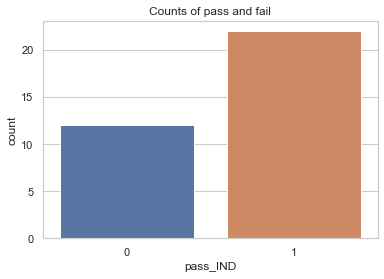

In [81]:
sns.countplot(x='pass_IND', data=df_clean).set_title('Counts of pass and fail')

In [82]:
grades = df_clean.iloc[:, 43:48]

In [83]:
cormatrix = grades.corr()
cormatrix.style.background_gradient(cmap='viridis_r')

,Session 2,Session 3,Session 4,Session 5,Session 6
Session 2,1.000000,0.662718,0.424830,0.491680,0.359912
Session 3,0.662718,1.000000,0.439425,0.439928,0.333721
Session 4,0.424830,0.439425,1.000000,0.379807,0.482203
Session 5,0.491680,0.439928,0.379807,1.000000,0.059477
Session 6,0.359912,0.333721,0.482203,0.059477,1.000000


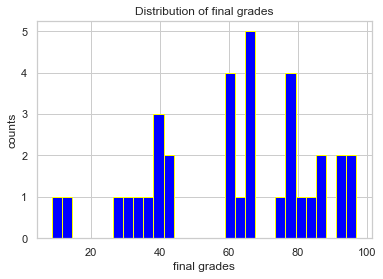

In [84]:
plt.hist(df['total'], color='blue', edgecolor='yellow', bins=30)
plt.xlabel("final grades")
plt.ylabel("counts")
plt.title("Distribution of final grades");

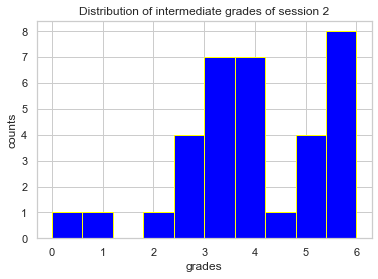

In [85]:
plt.hist(grades['Session 2'], color='blue', edgecolor='yellow')
plt.xlabel("grades")
plt.ylabel("counts")
plt.title("Distribution of intermediate grades of session 2");

In [86]:
sum_behv_passind=pd.merge(sum_behv, df, how='inner', left_on='student_Id', right_on='ID')
sum_behv_passind.head()

,student_Id,session,work_time,mouse_wheel,mouse_wheel_click,mouse_click_left,mouse_click_right,mouse_movement,keystroke,ID,Session 2,Session 3,Session 4,Session 5,Session 6,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),total,pass_IND
0,2,1,4215.0,0,0,2,0,45,1047,2,4.0,3.5,4.5,4.0,1.0,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0,0
1,2,2,8500.0,0,0,3696,98,69226,5151,2,4.0,3.5,4.5,4.0,1.0,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0,0
2,2,3,9741.0,1379,0,5543,304,259130,4873,2,4.0,3.5,4.5,4.0,1.0,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0,0
3,2,4,4095.0,826,0,1857,82,91633,2232,2,4.0,3.5,4.5,4.0,1.0,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0,0
4,2,5,5128.0,1570,0,2211,164,122581,3142,2,4.0,3.5,4.5,4.0,1.0,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0,0


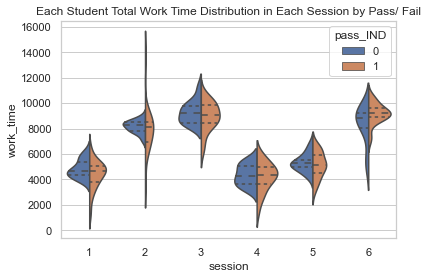

In [87]:
ax = sns.violinplot(x="session", y="work_time", hue="pass_IND", 
                    data=sum_behv_passind, split="True", inner="quartile").\
set_title("Each Student Total Work Time Distribution in Each Session by Pass/ Fail")

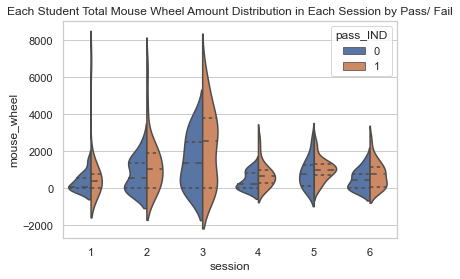

In [88]:
ax = sns.violinplot(x="session", y="mouse_wheel", hue="pass_IND", 
                    data=sum_behv_passind, split="True", inner="quartile").\
set_title("Each Student Total Mouse Wheel Amount Distribution in Each Session by Pass/ Fail")

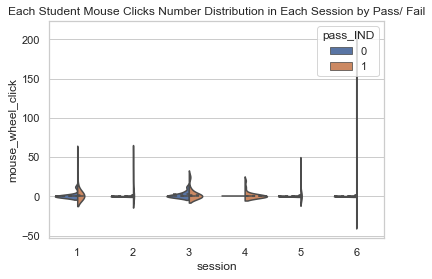

In [89]:
ax = sns.violinplot(x="session", y="mouse_wheel_click", hue="pass_IND", 
                    data=sum_behv_passind, split="True", inner="quartile").\
set_title("Each Student Mouse Clicks Number Distribution in Each Session by Pass/ Fail")

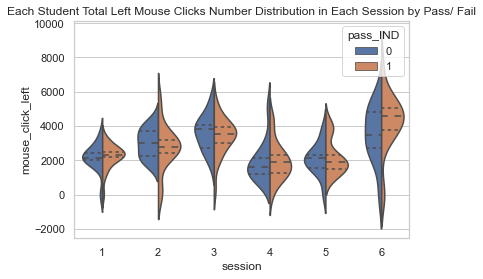

In [90]:
ax = sns.violinplot(x="session", y="mouse_click_left", hue="pass_IND", 
                    data=sum_behv_passind, split="True", inner="quartile").\
set_title("Each Student Total Left Mouse Clicks Number Distribution in Each Session by Pass/ Fail")

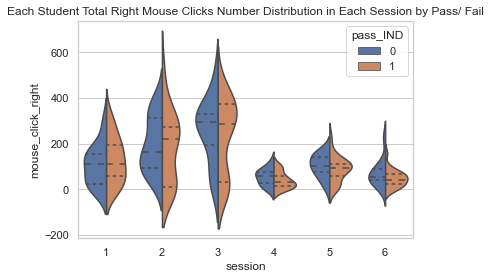

In [91]:
ax = sns.violinplot(x="session", y="mouse_click_right", hue="pass_IND", 
                    data=sum_behv_passind, split="True", inner="quartile").\
set_title("Each Student Total Right Mouse Clicks Number Distribution in Each Session by Pass/ Fail")

Classification

We need to start the modelling from scratch with dividing the data into test and train data.

In [92]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [93]:
df_clean.iloc[:, 1:43].head()

,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6
0,4215.0,8500.0,9741.0,4095.0,5128.0,5706.0,0.0,0.0,1379.0,826.0,1570.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3696.0,5543.0,1857.0,2211.0,2812.0,0.0,98.0,304.0,82.0,164.0,104.0,45.0,69226.0,259130.0,91633.0,122581.0,165494.0,1047.0,5151.0,4873.0,2232.0,3142.0,1140.0
1,4071.0,7754.0,8489.0,3252.0,5037.0,9027.0,586.0,1538.0,2069.0,489.0,1138.0,904.0,0.0,0.0,0.0,0.0,0.0,0.0,1977.0,4303.0,2703.0,1419.0,1924.0,4857.0,10.0,65.0,117.0,74.0,130.0,114.0,207317.0,317737.0,273721.0,119589.0,198103.0,427595.0,1207.0,5450.0,7433.0,2369.0,2701.0,1552.0
2,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,342.0,1088.0,968.0,18.0,0.0,0.0,0.0,2.0,0.0,2238.0,2733.0,3761.0,1068.0,1088.0,3533.0,64.0,168.0,390.0,34.0,82.0,96.0,107269.0,207043.0,156059.0,61183.0,84820.0,241519.0,1745.0,3873.0,5159.0,3270.0,3491.0,727.0
3,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,957.0,2577.0,1131.0,0.0,0.0,4.0,0.0,0.0,0.0,2244.0,3830.0,4709.0,5112.0,3855.0,4846.0,171.0,320.0,358.0,48.0,146.0,86.0,145381.0,226786.0,262458.0,183880.0,175403.0,246180.0,653.0,4299.0,2982.0,2394.0,2744.0,980.0
4,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,888.0,493.0,0.0,0.0,0.0,0.0,0.0,0.0,2446.0,2987.0,323.0,1429.0,1826.0,4583.0,149.0,274.0,2.0,15.0,132.0,62.0,219138.0,302207.0,26362.0,125858.0,195455.0,381456.0,458.0,3534.0,2609.0,2138.0,1887.0,1084.0


In [94]:
X = preprocessing.scale(df_clean.iloc[:, 1:43].values)
X_features = df_clean.iloc[:, 1:43].columns
y = df_clean.iloc[:, 48].values


# Split dataset into training set and test set
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [95]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (27, 42)
y_train shape: (27,)
X_test shape: (7, 42)
y_test shape: (7,)


So in train we have 27 students and in test data we have 7 students.

In [96]:
y_test

array([1, 1, 1, 0, 0, 0, 1], dtype=int64)

K- Nearest Neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier
# start trying with neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1)

In [98]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [99]:
y_pred = knn.predict(X_test)

In [100]:
np.mean(y_pred == y_test)

0.7142857142857143

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.8571428571428571

In [102]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.5714285714285714

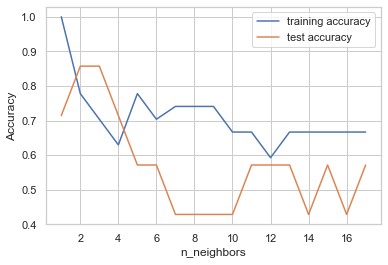

In [103]:
train_acc = []
test_acc = []
neighbors_set = range(1, 18)

for n_neighbors in neighbors_set:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

plt.plot(neighbors_set, train_acc, label="training accuracy")
plt.plot(neighbors_set, test_acc, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend();

In [104]:
max(test_acc)

0.8571428571428571

In [105]:
knn_param_grid = dict(n_neighbors=range(1, 18))
knn = KNeighborsClassifier()

In [106]:
from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, verbose=0)

In [107]:
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 18)})

In [108]:
knn_grid.best_params_

{'n_neighbors': 11}

In [109]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [110]:
y_pred = knn_grid.predict(X_test)

In [111]:
def print_clf_report(model_name):
    print('Confusion matrix of {}:'.format(model_name))
    print();
    print(confusion_matrix(y_test, y_pred))
    print();
    print('Classification report of {}:'.format(model_name))
    print();
    print(classification_report(y_test, y_pred))

In [112]:
print_clf_report('KNN')

Confusion matrix of KNN:

[[0 3]
 [0 4]]

Classification report of KNN:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
def print_cv_result(model_name):
    print(); print("Cross validation result of {}:".format(model_name))
    print(); print("Cross validation scores: {}".format(CV_result))
    print(); print("Mean of cross validation scores: {}".format(CV_result.mean()))
    print(); print("Standard deviation of cross validation scores: %0.2f" % CV_result.std())
    print(); print("Coefficient of Variation in CV result: %0.2f" % (CV_result.std()/CV_result.mean()))

In [114]:
CV_result = cross_val_score(knn_grid.best_estimator_, X_train, y_train, cv=5)

In [115]:
print_cv_result(model_name='KNN')


Cross validation result of KNN:

Cross validation scores: [0.66666667 0.66666667 0.8        0.6        0.6       ]

Mean of cross validation scores: 0.6666666666666667

Standard deviation of cross validation scores: 0.07

Coefficient of Variation in CV result: 0.11


We can see in this that after cross validation the accuracy score is 0.57.

Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dtree = DecisionTreeClassifier(random_state=1115)

In [118]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1115)

In [119]:
y_pred = dtree.predict(X_test)

In [120]:
print_clf_report('Decision tree')

Confusion matrix of Decision tree:

[[0 3]
 [2 2]]

Classification report of Decision tree:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.50      0.44         4

    accuracy                           0.29         7
   macro avg       0.20      0.25      0.22         7
weighted avg       0.23      0.29      0.25         7



In [121]:
dtree = DecisionTreeClassifier(random_state=1115)

In [122]:
criterion = ['gini', 'entropy']
max_depth = [2, 4, 6, 8, 10, 12]

In [123]:
dtree_param_grid = dict(criterion=criterion,
                        max_depth=max_depth)

In [124]:
dtree_grid = GridSearchCV(dtree, dtree_param_grid, cv=5, verbose=0)

In [125]:
dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1115),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [126]:
dtree_grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [127]:
dtree_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1115)

In [128]:
y_pred = dtree_grid.predict(X_test)

In [129]:
print_clf_report('Decision tree')

Confusion matrix of Decision tree:

[[0 3]
 [2 2]]

Classification report of Decision tree:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.50      0.44         4

    accuracy                           0.29         7
   macro avg       0.20      0.25      0.22         7
weighted avg       0.23      0.29      0.25         7



In [130]:
CV_result = cross_val_score(dtree_grid.best_estimator_, X_train, y_train, cv=5)

In [131]:
print_cv_result('Decision tree')


Cross validation result of Decision tree:

Cross validation scores: [0.66666667 0.33333333 0.6        0.4        0.4       ]

Mean of cross validation scores: 0.48

Standard deviation of cross validation scores: 0.13

Coefficient of Variation in CV result: 0.27


The accuracy came out to be 0.29.

Naive Bayes

In [132]:
from sklearn.naive_bayes import GaussianNB

In [133]:
gnb = GaussianNB()

In [134]:
gnb.fit(X_train, y_train)

GaussianNB()

In [135]:
y_pred = gnb.predict(X_test)

In [136]:
print_clf_report('Naive Bayes')

Confusion matrix of Naive Bayes:

[[2 1]
 [3 1]]

Classification report of Naive Bayes:

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.50      0.25      0.33         4

    accuracy                           0.43         7
   macro avg       0.45      0.46      0.42         7
weighted avg       0.46      0.43      0.40         7



In [137]:
gnb_param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07]}

In [138]:
gnb_grid = GridSearchCV(gnb, gnb_param_grid, cv=5, verbose=0)

In [139]:
gnb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]})

In [140]:
gnb_grid.best_params_

{'var_smoothing': 1e-09}

In [141]:
gnb_grid.best_estimator_

GaussianNB()

In [142]:
y_pred = gnb_grid.predict(X_test)

In [143]:
print_clf_report('Naive Bayes')

Confusion matrix of Naive Bayes:

[[2 1]
 [3 1]]

Classification report of Naive Bayes:

              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.50      0.25      0.33         4

    accuracy                           0.43         7
   macro avg       0.45      0.46      0.42         7
weighted avg       0.46      0.43      0.40         7



In [144]:
CV_result = cross_val_score(gnb_grid.best_estimator_, X_train, y_train, cv=5)

In [145]:
print_cv_result('Naive Bayes')


Cross validation result of Naive Bayes:

Cross validation scores: [0.5        0.66666667 0.6        0.6        0.6       ]

Mean of cross validation scores: 0.5933333333333334

Standard deviation of cross validation scores: 0.05

Coefficient of Variation in CV result: 0.09


In naive bayes model the accurracy after cross validation comes out to be 0.43.

Support Vector Machine

In [146]:
from sklearn.svm import SVC
svc = SVC(gamma='scale', random_state=1115)

In [147]:
svc.fit(X_train, y_train)

SVC(random_state=1115)

In [148]:
y_pred = svc.predict(X_test)

In [149]:
print_clf_report('SVM')

Confusion matrix of SVM:

[[0 3]
 [0 4]]

Classification report of SVM:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
svm_param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 
                  'kernel':["linear", "poly", "rbf", "sigmoid"]}

In [151]:
svm_grid = GridSearchCV(SVC(random_state=1115), svm_param_grid, cv=5, verbose=0)

In [152]:
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1115),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [153]:
svm_grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [154]:
svm_grid.best_estimator_

SVC(C=1000, gamma=0.1, kernel='sigmoid', random_state=1115)

In [155]:
y_pred = svm_grid.predict(X_test)

In [156]:
print_clf_report('SVM')

Confusion matrix of SVM:

[[2 1]
 [2 2]]

Classification report of SVM:

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.67      0.50      0.57         4

    accuracy                           0.57         7
   macro avg       0.58      0.58      0.57         7
weighted avg       0.60      0.57      0.57         7



In [157]:
CV_result = cross_val_score(svm_grid.best_estimator_, X_train, y_train, cv=5)

In [158]:
print_cv_result('SVM')


Cross validation result of SVM:

Cross validation scores: [0.5        0.83333333 0.8        0.8        0.6       ]

Mean of cross validation scores: 0.7066666666666668

Standard deviation of cross validation scores: 0.13

Coefficient of Variation in CV result: 0.19


In this model the accurracy came out to be 0.57.

Now we have got the accuracy of 4 models that is K-nearest, decision tree, Naive Bayes and Support vector machine. the accuracy that we got were as follows:

K- Nearest Neighbors - 0.57,
Decision Tree - 0.29, 
Naive Bayes - 0.43,
Support Vector Machine - 0.57.

So after this we can see that 2 models that has 0.57 and the Naive Bayes it came out to be 0.43. So we can further proceed with K-nearest neighbor and do the further accessing on the knn model. 


K-means Clustering

In [159]:
from sklearn.cluster import KMeans

The biggest disadvantage of K-Means clustering is that we need to specify the number of the clusters before we start clustering, however, we do have some methods to improve that disadvantage: elbow method. This method is a useful graphic tool to estimate the optimal number of clusters. In general, if the number of clusters increase, the within-cluster SSE (distortion) will decrease. This is because with the increasing of number of clusters, the samples will be closer to the centroids they are assigned to.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


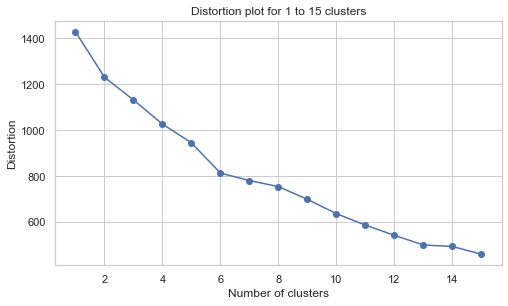

In [160]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 16):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(8,4.5))
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion plot for 1 to 15 clusters')
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


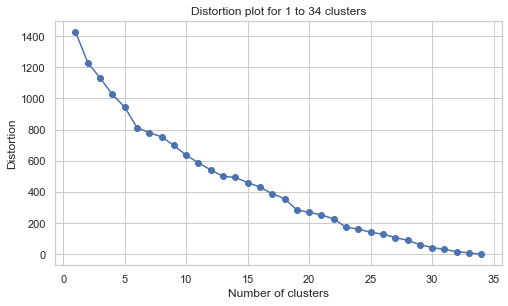

In [161]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 35):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(8,4.5))
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion plot for 1 to 34 clusters')
plt.show()

We can see there is a relatively big slope change where number of clusters equals to 6.

In [162]:
km = KMeans(n_clusters=6, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1115)
y_km = km.fit_predict(X)
y_km

array([5, 5, 5, 2, 1, 5, 2, 5, 5, 2, 5, 5, 5, 3, 4, 5, 5, 2, 5, 5, 1, 3,
       0, 5, 5, 5, 2, 2, 2, 2, 5, 5, 2, 5])

In [163]:
df_clean['cluster'] = y_km
df_clean.head()

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND,cluster
0,2,4215.0,8500.0,9741.0,4095.0,5128.0,5706.0,0.0,0.0,1379.0,826.0,1570.0,708.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3696.0,5543.0,1857.0,2211.0,2812.0,0.0,98.0,304.0,82.0,164.0,104.0,45.0,69226.0,259130.0,91633.0,122581.0,165494.0,1047.0,5151.0,4873.0,2232.0,3142.0,1140.0,4.0,3.5,4.5,4.0,1.00,0,5
1,5,4071.0,7754.0,8489.0,3252.0,5037.0,9027.0,586.0,1538.0,2069.0,489.0,1138.0,904.0,0.0,0.0,0.0,0.0,0.0,0.0,1977.0,4303.0,2703.0,1419.0,1924.0,4857.0,10.0,65.0,117.0,74.0,130.0,114.0,207317.0,317737.0,273721.0,119589.0,198103.0,427595.0,1207.0,5450.0,7433.0,2369.0,2701.0,1552.0,5.0,4.0,5.0,4.0,2.75,0,5
2,7,5086.0,7975.0,9421.0,4893.0,3465.0,8999.0,0.0,2145.0,728.0,342.0,1088.0,968.0,18.0,0.0,0.0,0.0,2.0,0.0,2238.0,2733.0,3761.0,1068.0,1088.0,3533.0,64.0,168.0,390.0,34.0,82.0,96.0,107269.0,207043.0,156059.0,61183.0,84820.0,241519.0,1745.0,3873.0,5159.0,3270.0,3491.0,727.0,4.0,4.0,4.5,4.0,2.00,1,5
3,10,4660.0,7736.0,8413.0,4976.0,5269.0,8151.0,573.0,1305.0,517.0,957.0,2577.0,1131.0,0.0,0.0,4.0,0.0,0.0,0.0,2244.0,3830.0,4709.0,5112.0,3855.0,4846.0,171.0,320.0,358.0,48.0,146.0,86.0,145381.0,226786.0,262458.0,183880.0,175403.0,246180.0,653.0,4299.0,2982.0,2394.0,2744.0,980.0,5.0,4.0,4.5,4.0,3.00,0,2
4,11,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,888.0,493.0,0.0,0.0,0.0,0.0,0.0,0.0,2446.0,2987.0,323.0,1429.0,1826.0,4583.0,149.0,274.0,2.0,15.0,132.0,62.0,219138.0,302207.0,26362.0,125858.0,195455.0,381456.0,458.0,3534.0,2609.0,2138.0,1887.0,1084.0,4.0,2.0,5.0,4.0,1.50,1,1


In [164]:
df_clean.cluster.value_counts()

5    19
2     9
1     2
3     2
0     1
4     1
Name: cluster, dtype: int64

Here we can see that how many students are having how many total marks out of 6 and how many are having paas and fail marks.

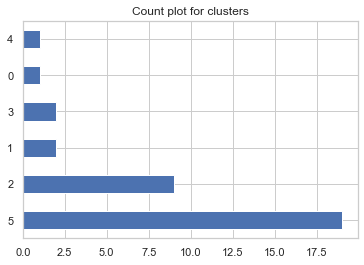

In [165]:
df_clean.cluster.value_counts().plot(kind='barh')
plt.title('Count plot for clusters');

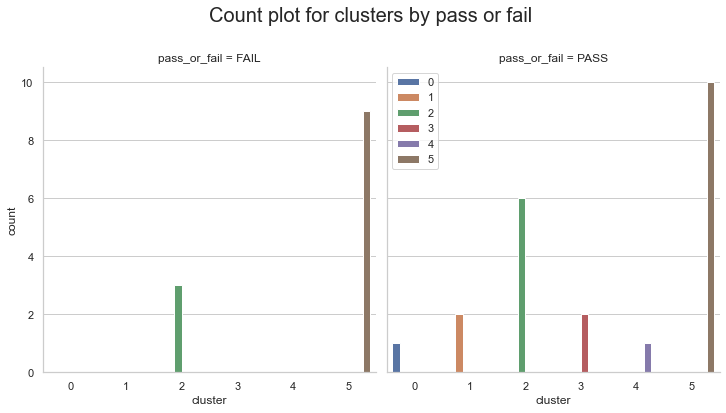

In [166]:
df_clean_copy = df_clean.copy()
df_clean_copy["pass_or_fail"] = ["PASS" if x == 1 else "FAIL" for x in df_clean_copy["pass_IND"]]

g = sns.catplot(x='cluster', hue='cluster', data=df_clean_copy, col="pass_or_fail",kind="count")

plt.legend(loc='upper left')
g.fig.suptitle("\n\n".join(['Count plot for clusters by pass or fail']),fontsize=20, y=1.1);

This plot shows the counts of clusters by pass or fail the final exam. There are 4 clusters that all students within them passed the final exam. In spite of the relative low accuracy of our classifiers, we still get some findings in K-Means clustering.

In [167]:
df_clean.loc[df_clean.cluster.isin([0, 1, 3, 4])]

,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND,cluster
4,11,4908.0,8785.0,9968.0,2459.0,3959.0,9095.0,312.0,1153.0,153.0,539.0,888.0,493.0,0.0,0.0,0.0,0.0,0.0,0.0,2446.0,2987.0,323.0,1429.0,1826.0,4583.0,149.0,274.0,2.0,15.0,132.0,62.0,219138.0,302207.0,26362.0,125858.0,195455.0,381456.0,458.0,3534.0,2609.0,2138.0,1887.0,1084.0,4.0,2.0,5.0,4.0,1.50,1,1
13,39,5099.0,8371.0,7442.0,4451.0,6397.0,8971.0,830.0,862.0,3856.0,834.0,921.0,1202.0,52.0,24.0,10.0,20.0,38.0,62.0,2526.0,2611.0,4482.0,2377.0,3777.0,4882.0,331.0,206.0,281.0,102.0,170.0,68.0,126575.0,123063.0,190050.0,104075.0,150790.0,267954.0,1553.0,5182.0,6397.0,1880.0,3720.0,1321.0,3.0,1.0,4.5,3.5,2.50,1,3
14,44,3623.0,8552.0,8274.0,4621.0,6278.0,9596.0,951.0,2374.0,6205.0,2725.0,2097.0,1642.0,0.0,0.0,0.0,2.0,0.0,0.0,2376.0,5677.0,4296.0,4306.0,3860.0,7730.0,2.0,8.0,14.0,42.0,16.0,25.0,256801.0,648982.0,652163.0,442229.0,477397.0,955690.0,1389.0,7330.0,4835.0,6230.0,4518.0,2818.0,5.5,4.0,4.5,4.0,3.00,1,4
20,66,2979.0,13764.0,6180.0,1478.0,5113.0,9880.0,1434.0,6457.0,2960.0,0.0,1175.0,1289.0,0.0,0.0,0.0,0.0,0.0,0.0,2302.0,5016.0,1796.0,565.0,1388.0,5075.0,112.0,529.0,148.0,0.0,53.0,90.0,123443.0,301295.0,106836.0,27659.0,41410.0,391809.0,786.0,5226.0,2616.0,1656.0,2858.0,30448.0,0.0,2.0,4.5,3.0,2.25,1,1
21,67,3765.0,6548.0,8102.0,3430.0,4968.0,7041.0,441.0,1910.0,4037.0,682.0,2509.0,2620.0,0.0,51.0,24.0,6.0,38.0,170.0,2326.0,3813.0,4780.0,2834.0,3748.0,3920.0,290.0,372.0,346.0,52.0,230.0,58.0,96551.0,330602.0,356067.0,194313.0,265130.0,360937.0,524.0,3129.0,4074.0,1707.0,2504.0,1718.0,5.5,4.0,4.5,4.0,2.75,1,3
22,70,3959.0,8533.0,8615.0,4631.0,3928.0,10547.0,14.0,0.0,2781.0,1010.0,1242.0,0.0,0.0,2.0,25.0,12.0,0.0,0.0,16.0,3.0,3494.0,3416.0,1803.0,0.0,0.0,0.0,383.0,24.0,108.0,0.0,2050.0,148.0,179536.0,142267.0,89810.0,0.0,1023.0,4618.0,5599.0,252.0,2027.0,2162.0,5.5,4.0,5.0,4.0,3.25,1,0


In [168]:
df_cluster = df_clean.groupby(['cluster'], as_index=False).mean()

In [169]:
df_cluster

,cluster,student_Id,work_time1,work_time2,work_time3,work_time4,work_time5,work_time6,mouse_wheel1,mouse_wheel2,mouse_wheel3,mouse_wheel4,mouse_wheel5,mouse_wheel6,mouse_wheel_click1,mouse_wheel_click2,mouse_wheel_click3,mouse_wheel_click4,mouse_wheel_click5,mouse_wheel_click6,mouse_click_left1,mouse_click_left2,mouse_click_left3,mouse_click_left4,mouse_click_left5,mouse_click_left6,mouse_click_right1,mouse_click_right2,mouse_click_right3,mouse_click_right4,mouse_click_right5,mouse_click_right6,mouse_movement1,mouse_movement2,mouse_movement3,mouse_movement4,mouse_movement5,mouse_movement6,keystroke1,keystroke2,keystroke3,keystroke4,keystroke5,keystroke6,Session 2,Session 3,Session 4,Session 5,Session 6,pass_IND
0,0,70.000000,3959.000000,8533.000000,8615.000000,4631.000000,3928.000000,10547.000000,14.000000,0.000000,2781.000000,1010.000000,1242.000000,0.000000,0.000000,2.000000,25.000000,12.0,0.000000,0.000000,16.000000,3.000000,3494.000000,3416.000000,1803.000000,0.000000,0.000000,0.000000,383.000000,24.000000,108.000000,0.000000,2050.000000,148.000000,179536.000000,142267.000000,89810.000000,0.000000,1023.000000,4618.000000,5599.000000,252.000000,2027.000000,2162.000000,5.500000,4.000000,5.000000,4.000000,3.250000,1.000000
1,1,38.500000,3943.500000,11274.500000,8074.000000,1968.500000,4536.000000,9487.500000,873.000000,3805.000000,1556.500000,269.500000,1031.500000,891.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2374.000000,4001.500000,1059.500000,997.000000,1607.000000,4829.000000,130.500000,401.500000,75.000000,7.500000,92.500000,76.000000,171290.500000,301751.000000,66599.000000,76758.500000,118432.500000,386632.500000,622.000000,4380.000000,2612.500000,1897.000000,2372.500000,15766.000000,2.000000,2.000000,4.750000,3.500000,1.875000,1.000000
2,2,61.000000,4469.222222,7946.000000,9261.777778,4497.444444,5058.111111,8597.444444,387.444444,1349.000000,2615.111111,769.555556,1258.666667,1001.444444,1.333333,0.222222,1.777778,0.0,0.000000,0.222222,2368.666667,2966.666667,3710.555556,2018.555556,2120.000000,4602.555556,205.222222,278.555556,379.222222,26.333333,114.888889,90.777778,129649.666667,174697.777778,215594.555556,111046.888889,129842.666667,293272.555556,791.000000,3440.333333,4301.666667,2104.111111,2099.222222,1172.333333,4.500000,3.611111,4.722222,3.833333,2.250000,0.666667
3,3,53.000000,4432.000000,7459.500000,7772.000000,3940.500000,5682.500000,8006.000000,635.500000,1386.000000,3946.500000,758.000000,1715.000000,1911.000000,26.000000,37.500000,17.000000,13.0,38.000000,116.000000,2426.000000,3212.000000,4631.000000,2605.500000,3762.500000,4401.000000,310.500000,289.000000,313.500000,77.000000,200.000000,63.000000,111563.000000,226832.500000,273058.500000,149194.000000,207960.000000,314445.500000,1038.500000,4155.500000,5235.500000,1793.500000,3112.000000,1519.500000,4.250000,2.500000,4.500000,3.750000,2.625000,1.000000
4,4,44.000000,3623.000000,8552.000000,8274.000000,4621.000000,6278.000000,9596.000000,951.000000,2374.000000,6205.000000,2725.000000,2097.000000,1642.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,2376.000000,5677.000000,4296.000000,4306.000000,3860.000000,7730.000000,2.000000,8.000000,14.000000,42.000000,16.000000,25.000000,256801.000000,648982.000000,652163.000000,442229.000000,477397.000000,955690.000000,1389.000000,7330.000000,4835.000000,6230.000000,4518.000000,2818.000000,5.500000,4.000000,4.500000,4.000000,3.000000,1.000000
5,5,47.421053,4714.210526,7680.578947,9261.052632,4372.684211,5299.315789,8897.473684,651.421053,788.842105,1300.631579,477.894737,650.736842,344.315789,2.000000,2.947368,1.263158,0.0,0.421053,0.526316,2190.052632,2608.052632,3450.842105,1751.157895,1996.947368,3615.526316,73.789474,129.894737,186.842105,55.684211,75.684211,41.421053,109563.421053,119855.578947,174178.526316,87675.000000,114443.315789,177909.736842,1322.157895,3966.421053,5052.684211,2151.421053,3014.105263,1142.473684,3.684211,3.210526,4.578947,3.868421,2.263158,0.526316
